<a href="https://colab.research.google.com/github/tafartech/DeepSentiment/blob/main/DeepSentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excellent choice! IMDB Movie Reviews is a great dataset for a simple language model. We can use the Keras dataset loader to easily download and preprocess the data.

Let's get started!

In [ ]:
!pip install --upgrade keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 22.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
import keras
print(keras.__version__)

3.3.3


In [ ]:
import tensorflow as tf

# Check if GPU is available
if tf.config.experimental.list_physical_devices('GPU'):
    print("You are using a GPU!")
else:
    print("You are not using a GPU.")

You are using a GPU!


# Load and Process Data

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Load and preprocess data (same as before)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
max_length = 500
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#Define Model Architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, GlobalAveragePooling1D

# Define the model architecture (but don't compile or summarize yet)
vocab_size = 5000
embedding_dim = 128

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    GlobalAveragePooling1D(),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


#Input shape and Model summary

In [ ]:
# Define input shape explicitly
input_shape = (max_length, 1)  # Since you expanded dims to (samples, 1)

# Build the model (this will calculate the number of parameters correctly)
model.build(input_shape=input_shape)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary (now it should show the correct parameter counts)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (500, 1, 128)               │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (500, 1, 256)               │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (500, 1, 256)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (500, 1, 128)               │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (500, 1, 128)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (500, 128)                  │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (500, 1)                    │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 706,049 (2.69 MB)

 Trainable params: 706,049 (2.69 MB)

 Non-trainable params: 0 (0.00 B)

#Model Training

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.6321 - loss: 0.6010 - val_accuracy: 0.8780 - val_loss: 0.3054
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9008 - loss: 0.2605 - val_accuracy: 0.8882 - val_loss: 0.2845
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9172 - loss: 0.2168 - val_accuracy: 0.8788 - val_loss: 0.3188
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9288 - loss: 0.1890 - val_accuracy: 0.8836 - val_loss: 0.3074
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9316 - loss: 0.1782 - val_accuracy: 0.8800 - val_loss: 0.3277
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9400 - loss: 0.1590 - val_accuracy: 0.8774 - val_loss: 0.3378
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9348 - loss: 0.1776 - val_accuracy: 0.8740 - val_loss: 0.3482
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9393 - loss: 0.1553 - val_accuracy:

#Evaluation

In [ ]:
# Evaluate on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8622 - loss: 0.4147
Test accuracy: 0.8592


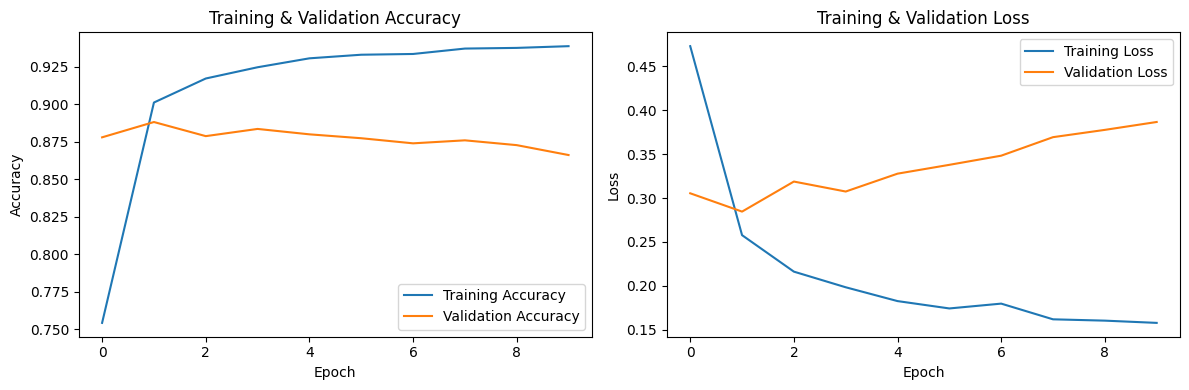

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.tight_layout()
plt.show()

In [ ]:
pip install pydot graphviz

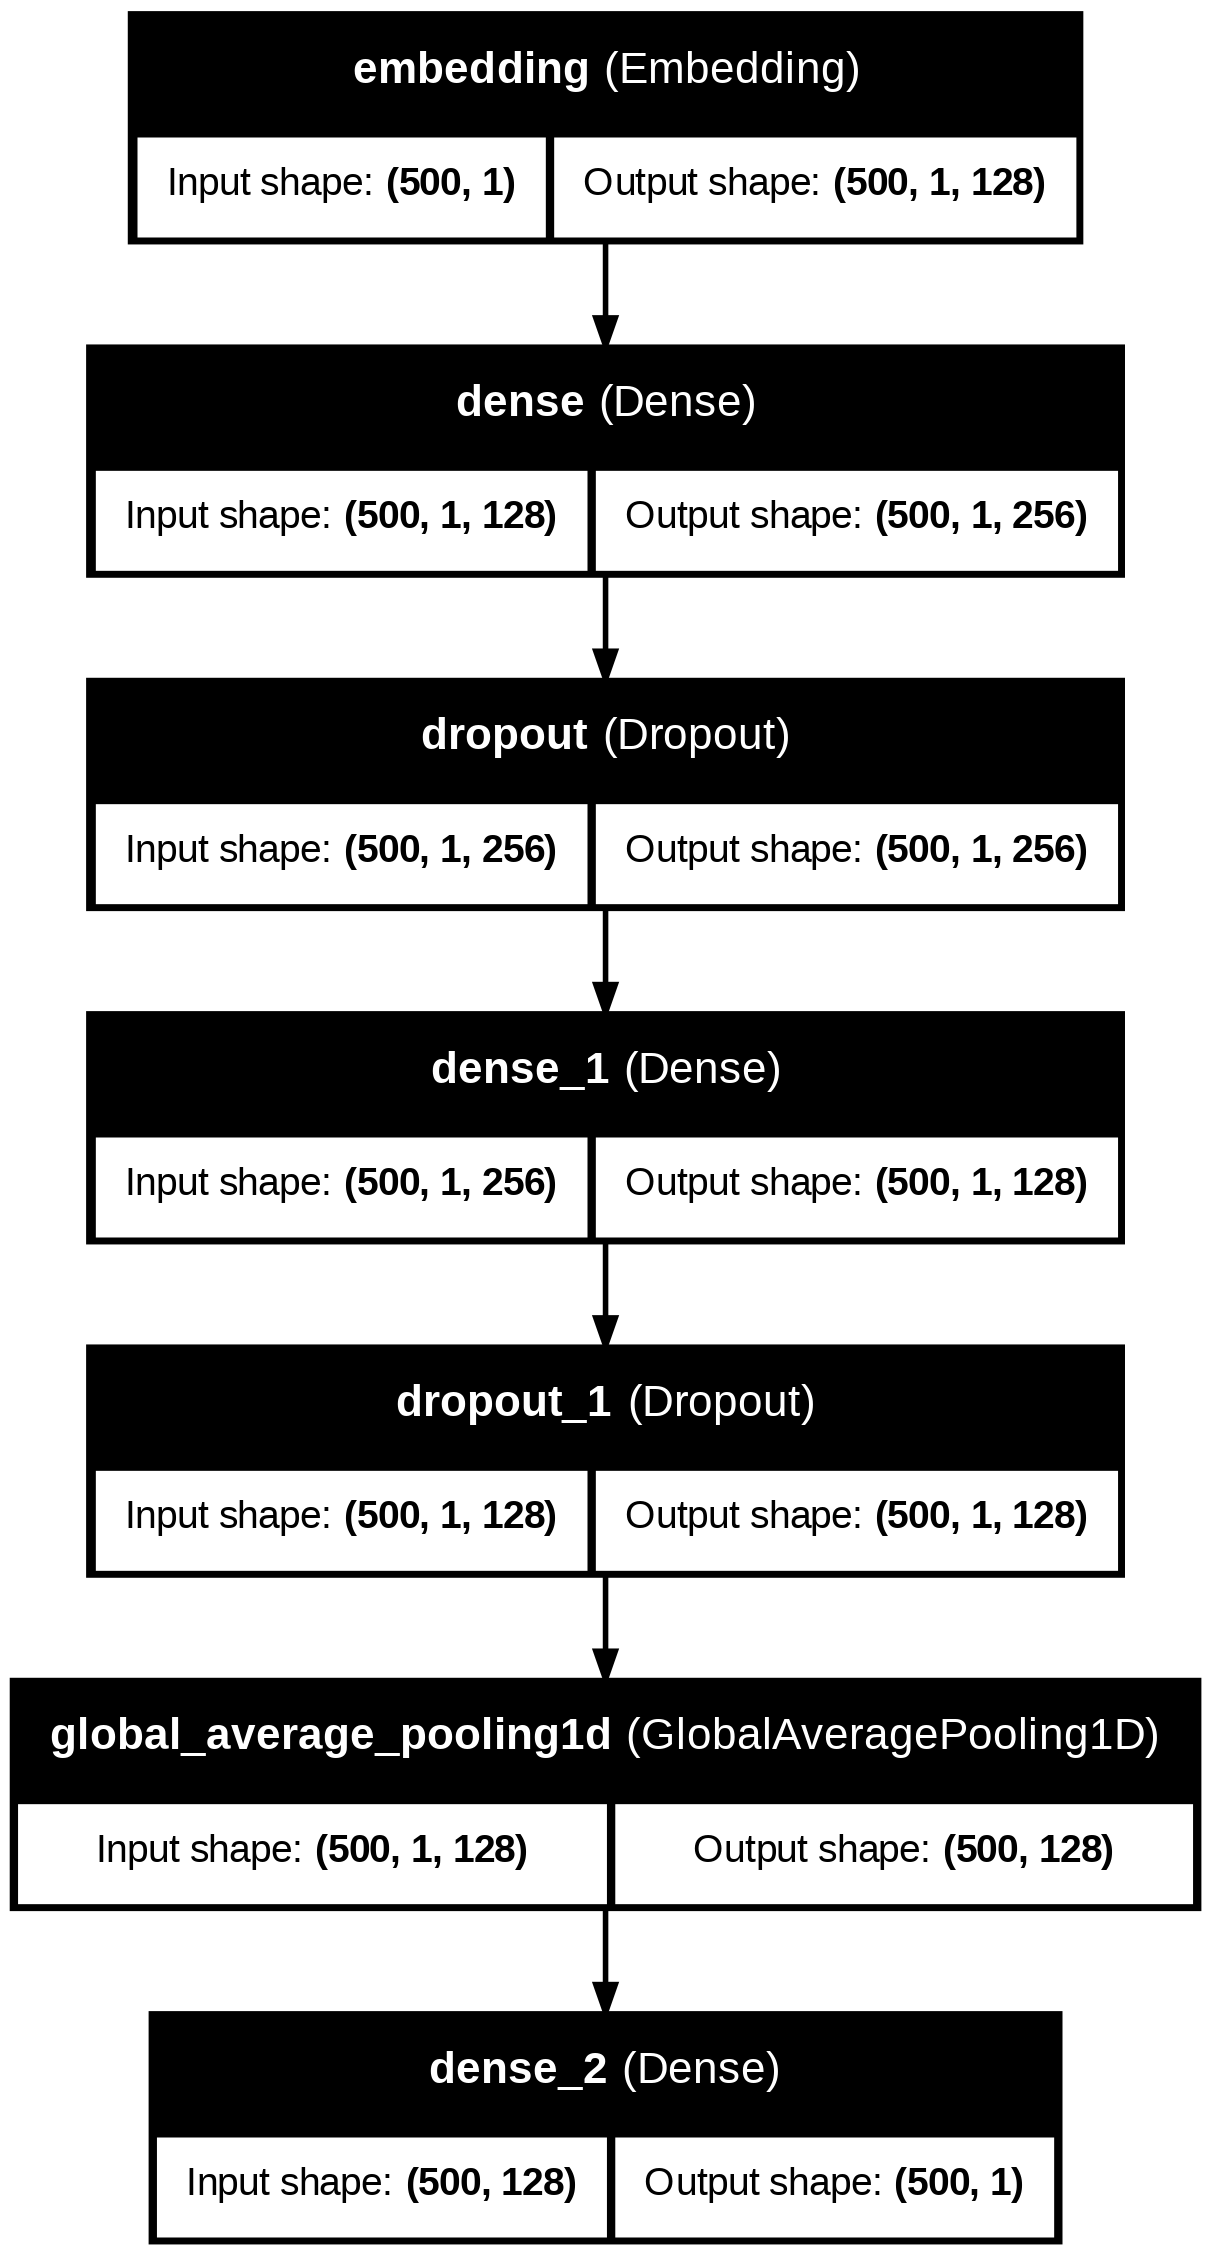

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Let's explore some techniques to enhance the sentiment analysis project and delve deeper into the nature of the IMDb dataset.
1. Evaluate Model Performance In-Depth:
 * Confusion Matrix: Generate a confusion matrix to visualize the types of errors your model is making (false positives and false negatives). This can provide insights into specific areas where the model struggles.
 * Classification Report: Obtain a classification report (precision, recall, F1-score) for both classes (positive and negative sentiment). This gives a more detailed picture of performance beyond overall accuracy.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Confusion Matrix:
[[11036  1464]
 [ 2056 10444]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.88      0.86     12500
    Positive       0.88      0.84      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



#Visualize the confusion Matrix


# Interpretation:
The heatmap will visualize the confusion matrix with the following information:
 * Rows: Represent the true labels (Negative, Positive).
 * Columns: Represent the predicted labels (Negative, Positive).
 * Values in Cells: The number of samples for each combination of true and predicted labels.
   * Top-left: True negatives (correctly predicted as negative)
   * Top-right: False positives (incorrectly predicted as positive)
   * Bottom-left: False negatives (incorrectly predicted as negative)
   * Bottom-right: True positives (correctly predicted as positive)

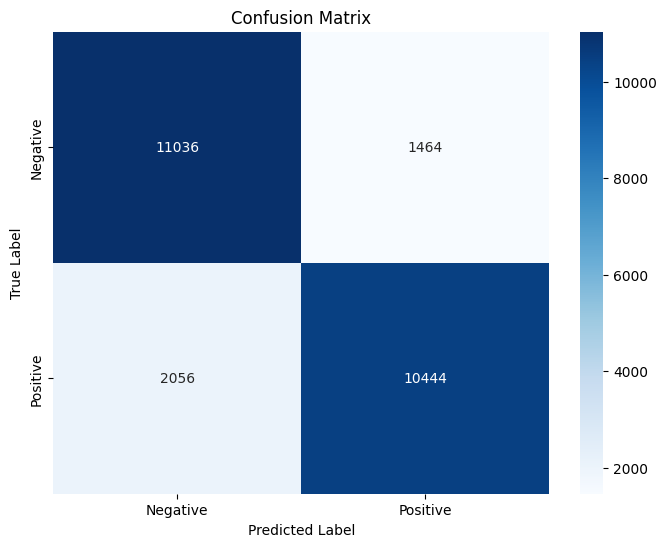

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred (predicted labels)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#Modified model and regulations

**Load and Process the IMDb dataset again**

In [ ]:

import re
import numpy as np
from keras.datasets import imdb
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources (run once)
nltk.download('stopwords')
nltk.download('wordnet')

# Load the IMDb dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000)

# Combine training and validation data for preprocessing
X_train_val = np.concatenate((X_train, X_test), axis=0)
y_train_val = np.concatenate((y_train, y_test), axis=0)

# Convert integer sequences back to text
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text])

X_train_val_text = [decode_review(x) for x in X_train_val]

# Text Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

X_train_val_preprocessed = [preprocess_text(x) for x in X_train_val_text]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Handle class imbalance (SMOTE) and Tokenize Pad/Text**

In [ ]:
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Tokenization and Padding before SMOTE
max_length = 500  # Maximum sequence length (adjust as needed)

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train_val_preprocessed)

X_train_val_seq = tokenizer.texts_to_sequences(X_train_val_preprocessed)
X_train_val_pad = pad_sequences(X_train_val_seq, maxlen=max_length, padding='post', truncating='post')

# Now we have numeric data for SMOTE

# Handling Class Imbalance (SMOTE Example)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_val_pad, y_train_val)

# Recreate Train/Test Split (using the resampled data)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [ ]:
pip install keras-self-attention

  Preparing metadata (setup.py) ... done
  Created wheel for keras-self-attention: filename=keras_self_attention-0.51.0-py3-none-any.whl size=18894 sha256=f2296f37fbb0a81e79f4278131579579ca27255c8c0975a115a9bdb9532f1ba2
  Stored in directory: /root/.cache/pip/wheels/b8/f7/24/607b483144fb9c47b4ba2c5fba6b68e54aeee2d5bf6c05302e
Successfully built keras-self-attention


#Model Building

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dropout, Attention

vocab_size = 5000
embedding_dim = 128

# Input layer
input_layer = Input(shape=(max_length,))

# Embedding layer
embedding_layer = Embedding(vocab_size, embedding_dim)(input_layer)

# Bidirectional LSTM layer
lstm_layer = Bidirectional(LSTM(128, return_sequences=True))(embedding_layer)

# Attention mechanism (applied to query, value, and key from the LSTM output)
query_value_attention_seq = Attention()([lstm_layer, lstm_layer, lstm_layer])

# Dense layers for further feature learning
dense_layer1 = Dense(256, activation='relu')(query_value_attention_seq)
dropout_layer1 = Dropout(0.5)(dense_layer1)
dense_layer2 = Dense(128, activation='relu')(dropout_layer1)
dropout_layer2 = Dropout(0.3)(dense_layer2)
# Flatten/Pool the output
flatten_layer = GlobalAveragePooling1D()(dropout_layer2)
# OR: flatten_layer = Flatten()(dropout_layer2)

# Output layer for binary classification
output_layer = Dense(1, activation='sigmoid')(flatten_layer)
model = Model(inputs=input_layer, outputs=output_layer)

# Output layer for binary classification
# output_layer = Dense(1, activation='sigmoid')(dropout_layer2)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

# Build and summarize the model
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 500)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_7 (Embedding)   │ (None, 500, 128)       │        640,000 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_6           │ (None, 500, 256)       │        263,168 │ embedding_7[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention_6 (Attention)   │ (None, 500, 256)       │              0 │ bidirectional_6[0][0], │
│                           │                        │                │ bidirectional_6[0][0], │
│                           │                        │                │ bidirectional_6[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_19 (Dense)          │ (None, 500, 256)       │         65,792 │ attention_6[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_12 (Dropout)      │ (None, 500, 256)       │              0 │ dense_19[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_20 (Dense)          │ (None, 500, 128)       │         32,896 │ dropout_12[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_13 (Dropout)      │ (None, 500, 128)       │              0 │ dense_20[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling1d… │ (None, 128)            │              0 │ dropout_13[0][0]       │
│ (GlobalAveragePooling1D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_21 (Dense)          │ (None, 1)              │            129 │ global_average_poolin… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,001,985 (3.82 MB)

 Trainable params: 1,001,985 (3.82 MB)

 Non-trainable params: 0 (0.00 B)

**Model Training**

In [ ]:
# Load the IMDb dataset
max_length = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping]
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.5751 - loss: 0.6574 - val_accuracy: 0.8682 - val_loss: 0.3382
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 77ms/step - accuracy: 0.8876 - loss: 0.2928 - val_accuracy: 0.8984 - val_loss: 0.2709
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.9256 - loss: 0.1963 - val_accuracy: 0.8918 - val_loss: 0.3083
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.9487 - loss: 0.1385 - val_accuracy: 0.8946 - val_loss: 0.2860
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 78ms/step - accuracy: 0.9672 - loss: 0.0964 - val_accuracy: 0.8924 - val_loss: 0.3424
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.8909 - loss: 0.2775
Test Loss: 0.27266231179237366, Test Accuracy: 0.8926399946212769


*Visualize the training*

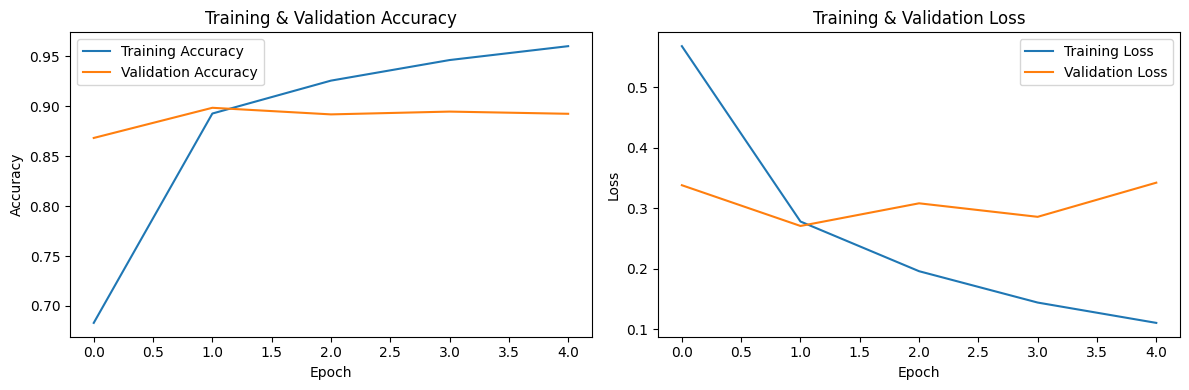

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

# Plot Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')

plt.tight_layout()
plt.show()

#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step
Confusion Matrix:
[[11201  1299]
 [ 1385 11115]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.89      0.90      0.89     12500
    Positive       0.90      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



# Analysis of the confusion matrix and classification:
Confusion Matrix
[[11201  1299]
 [ 1385 11115]]

 * True Negatives (TN): 11201 (The model correctly predicted negative reviews)
 * False Positives (FP): 1299 (The model incorrectly predicted negative reviews as positive)
 * False Negatives (FN): 1385 (The model incorrectly predicted positive reviews as negative)
 * True Positives (TP): 11115 (The model correctly predicted positive reviews)
Classification Report
              precision    recall  f1-score   support

    Negative       0.89      0.90      0.89     12500
    Positive       0.90      0.89      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000

 * Precision (Negative): 0.89 (Out of all the reviews predicted as negative, 89% were actually negative)
 * Recall (Negative): 0.90 (Out of all the actual negative reviews, 90% were correctly predicted)
 * F1-score (Negative): 0.89 (The harmonic mean of precision and recall for the negative class)
 * Precision (Positive): 0.90
 * Recall (Positive): 0.89
 * F1-score (Positive): 0.89
 * Accuracy: 0.89 (Overall, the model correctly classified 89% of the reviews)
 * Macro Avg & Weighted Avg: Since the dataset is balanced (equal number of positive and negative reviews), the macro and weighted averages are the same as the individual class scores.
Analysis
 * Good Performance: The model achieves a high accuracy of 89%, indicating that it's doing a good job of classifying sentiments.
 * Balanced Performance: Precision, recall, and F1-score are very similar for both positive and negative classes, suggesting that the model performs equally well on both sentiment types.
 * Slight Error Bias: There's a slightly higher number of false negatives (1385) compared to false positives (1299). This means the model is a bit more likely to misclassify a positive review as negative than the other way around.
Visualizing the Metrics

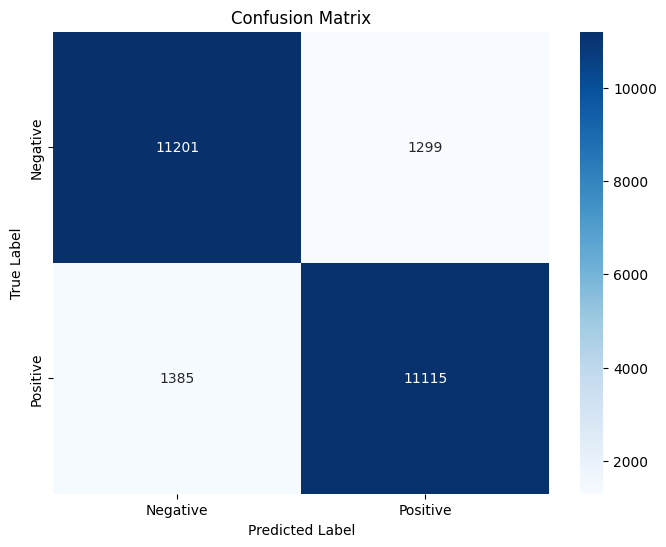

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_test and y_pred (predicted labels)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()